In [3]:
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [4]:
!pip install pydot

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/c3/f1/e61d6dfe6c1768ed2529761a68f70939e2569da043e9f15a8d84bf56cadf/pydot-1.2.4.tar.gz
  Running setup.py bdist_wheel for pydot ... - done
  Stored in directory: /content/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot


In [1]:
from __future__ import print_function

import numpy as np
np.random.seed(123)  # for reproducibility

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,20) # Make the figures a bit bigger

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint   
import pydot
from IPython.display import SVG
from keras import backend as K

from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# View Images

In [3]:
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


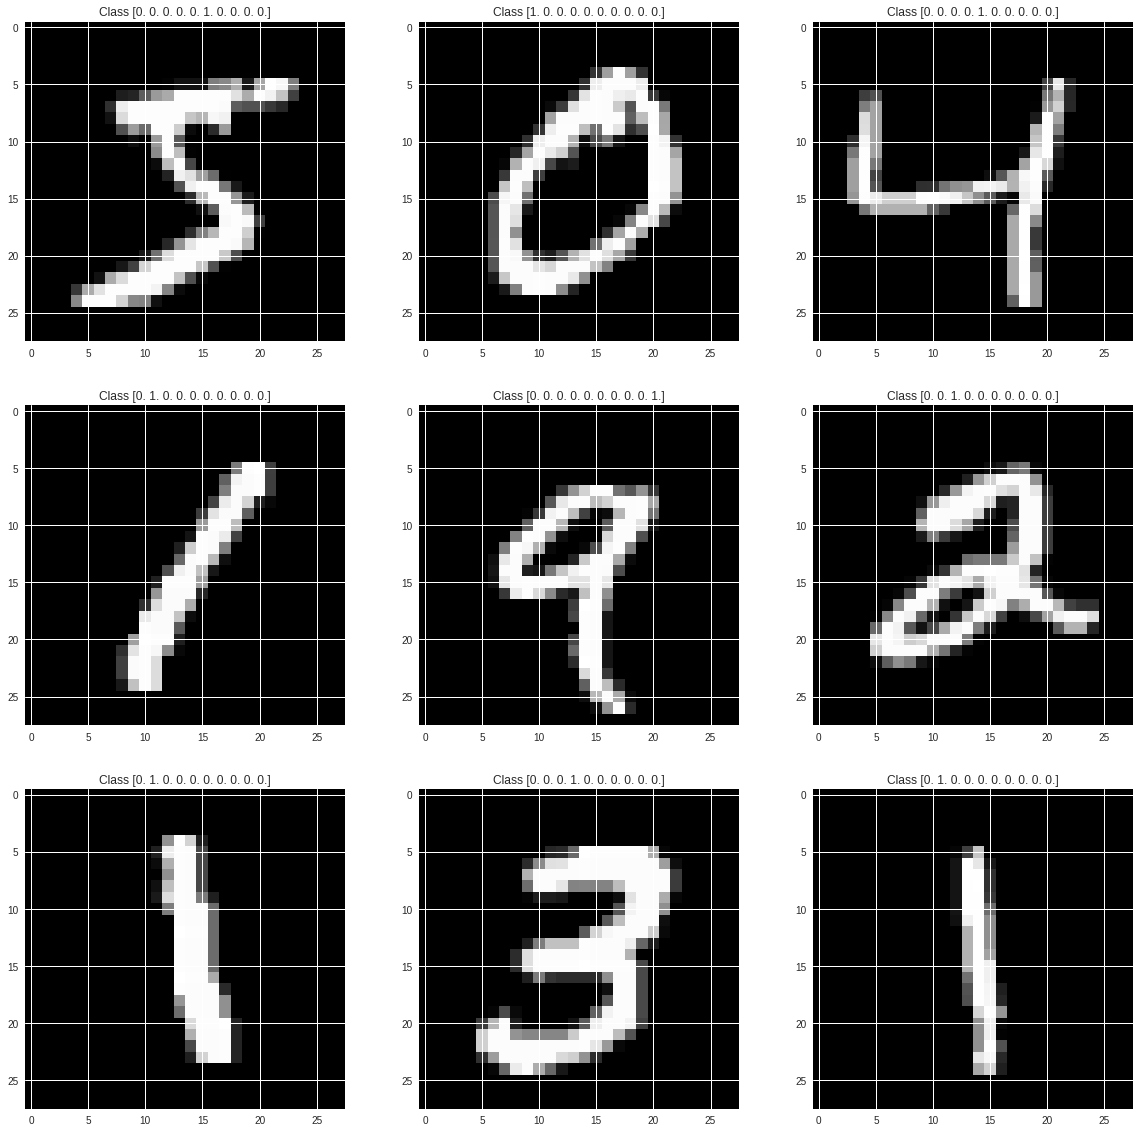

In [45]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# Load Images

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model Architecture

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

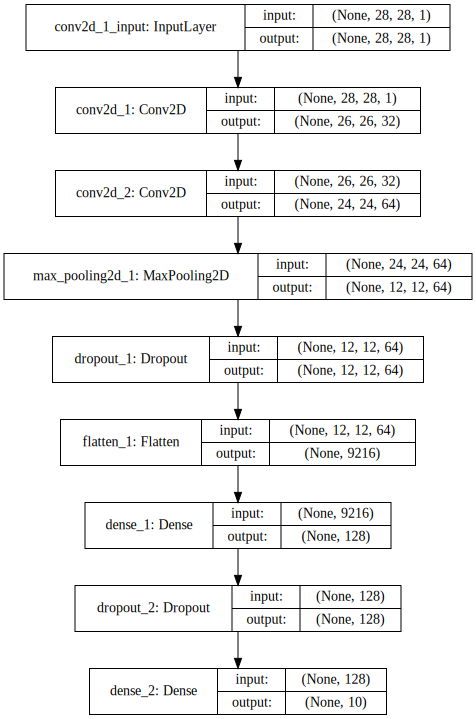

In [7]:
SVG(model_to_dot(model,show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

# Fit model

In [8]:
checkpointer = ModelCheckpoint(filepath='mnist_cnn.model.best.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[checkpointer],
                    shuffle=True
                   )
(test_loss, test_accuracy) = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 10s 215us/step - loss: 0.3119 - acc: 0.9042 - val_loss: 0.0683 - val_acc: 0.9798

Epoch 00001: val_loss improved from inf to 0.06826, saving model to mnist_cnn.model.best.hdf5
Epoch 2/12
48000/48000 [==============================] - 8s 174us/step - loss: 0.0992 - acc: 0.9709 - val_loss: 0.0497 - val_acc: 0.9847

Epoch 00002: val_loss improved from 0.06826 to 0.04966, saving model to mnist_cnn.model.best.hdf5
Epoch 3/12
20864/48000 [============>.................] - ETA: 4s - loss: 0.0758 - acc: 0.9773

48000/48000 [==============================] - 8s 174us/step - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0458 - val_acc: 0.9868

Epoch 00003: val_loss improved from 0.04966 to 0.04583, saving model to mnist_cnn.model.best.hdf5
Epoch 4/12
48000/48000 [==============================] - 8s 173us/step - loss: 0.0590 - acc: 0.9823 - val_loss: 0.0470 - val_acc: 0.9870

Epoch 00004: val_loss did not improve from 0.04583
Epoch 5/12
39936/48000 [=======================>......] - ETA: 1s - loss: 0.0497 - acc: 0.9854

48000/48000 [==============================] - 8s 175us/step - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0370 - val_acc: 0.9893

Epoch 00005: val_loss improved from 0.04583 to 0.03700, saving model to mnist_cnn.model.best.hdf5
Epoch 6/12
48000/48000 [==============================] - 8s 174us/step - loss: 0.0456 - acc: 0.9863 - val_loss: 0.0353 - val_acc: 0.9902

Epoch 00006: val_loss improved from 0.03700 to 0.03530, saving model to mnist_cnn.model.best.hdf5
Epoch 7/12
39296/48000 [=======================>......] - ETA: 1s - loss: 0.0405 - acc: 0.9874

48000/48000 [==============================] - 8s 173us/step - loss: 0.0407 - acc: 0.9874 - val_loss: 0.0390 - val_acc: 0.9887

Epoch 00007: val_loss did not improve from 0.03530
Epoch 8/12
48000/48000 [==============================] - 8s 172us/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0384 - val_acc: 0.9892

Epoch 00008: val_loss did not improve from 0.03530
Epoch 9/12
48000/48000 [==============================] - 8s 174us/step - loss: 0.0335 - acc: 0.9901 - val_loss: 0.0372 - val_acc: 0.9892

Epoch 00009: val_loss did not improve from 0.03530
Epoch 10/12
 2432/48000 [>.............................] - ETA: 7s - loss: 0.0236 - acc: 0.9938

48000/48000 [==============================] - 8s 175us/step - loss: 0.0297 - acc: 0.9906 - val_loss: 0.0327 - val_acc: 0.9908

Epoch 00010: val_loss improved from 0.03530 to 0.03268, saving model to mnist_cnn.model.best.hdf5
Epoch 11/12
48000/48000 [==============================] - 8s 174us/step - loss: 0.0257 - acc: 0.9921 - val_loss: 0.0355 - val_acc: 0.9898

Epoch 00011: val_loss did not improve from 0.03268
Epoch 12/12
36096/48000 [=====================>........] - ETA: 1s - loss: 0.0245 - acc: 0.9924

48000/48000 [==============================] - 8s 174us/step - loss: 0.0261 - acc: 0.9919 - val_loss: 0.0353 - val_acc: 0.9899

Epoch 00012: val_loss did not improve from 0.03268
Test loss: 0.027379453176600146
Test accuracy: 0.9921


In [0]:
model.save('mnist.h5')

In [0]:
from keras.models import load_model

In [0]:
from google.colab import files
files.download('mnist.h5')

In [0]:
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('mnist.h5')

In [0]:
def predict(img):
  print (img.shape)
  plt.imshow(img, cmap='gray', interpolation='none')
  model.predict_classes(img)
  #plt.imshow(img.reshape((28,28)))

In [43]:
x_test[1].reshape((28,28)).shape

(28, 28)

In [48]:
X_test[1].shape

(28, 28)

In [52]:
model.predict_classes(x_test[1])

ValueError: ignored

(28, 28)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


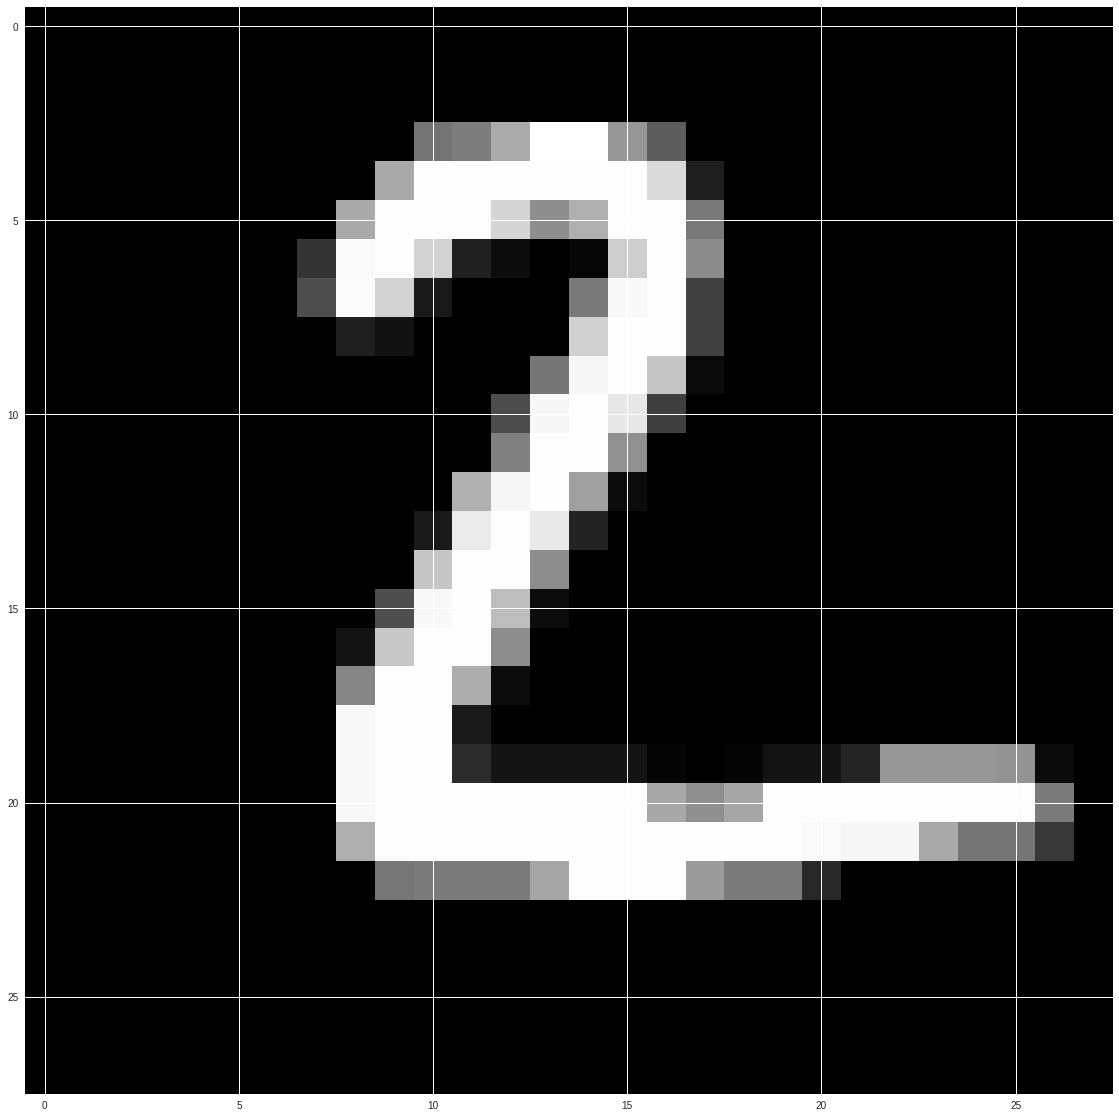

In [50]:
predict(X_test[1])
print (y_test[1])

In [0]:
x = np.expand_dims(x_test[1], axis=0)



In [21]:
model.predict_classes(x)

array([2])

In [54]:
test_img.shape

(1, 28, 28, 1)

In [55]:
test_img = np.expand_dims(X_test[1], axis=0)
img_class = model.predict_classes(test_img)
img_class


ValueError: ignored

In [61]:
test_img = np.expand_dims(x_test[1], axis=0)
class_prob = model.predict_proba(test_img,verbose = 2)
class_prob


array([[9.4231156e-09, 1.3456809e-06, 9.9999869e-01, 2.8178959e-11,
        1.3605671e-12, 2.9058722e-14, 5.2333399e-10, 2.2273814e-13,
        5.8055587e-12, 1.4750939e-12]], dtype=float32)

In [67]:
len(class_prob[0])

10

In [69]:
sorted(range(len(class_prob[0])), key=lambda i: class_prob[0][i])

[5, 7, 4, 9, 8, 3, 6, 0, 1, 2]

In [70]:
top_values_index = sorted(range(len(class_prob[0])), key=lambda i: class_prob[0][i])[-5:]
top_values_index

[3, 6, 0, 1, 2]

Class:  2


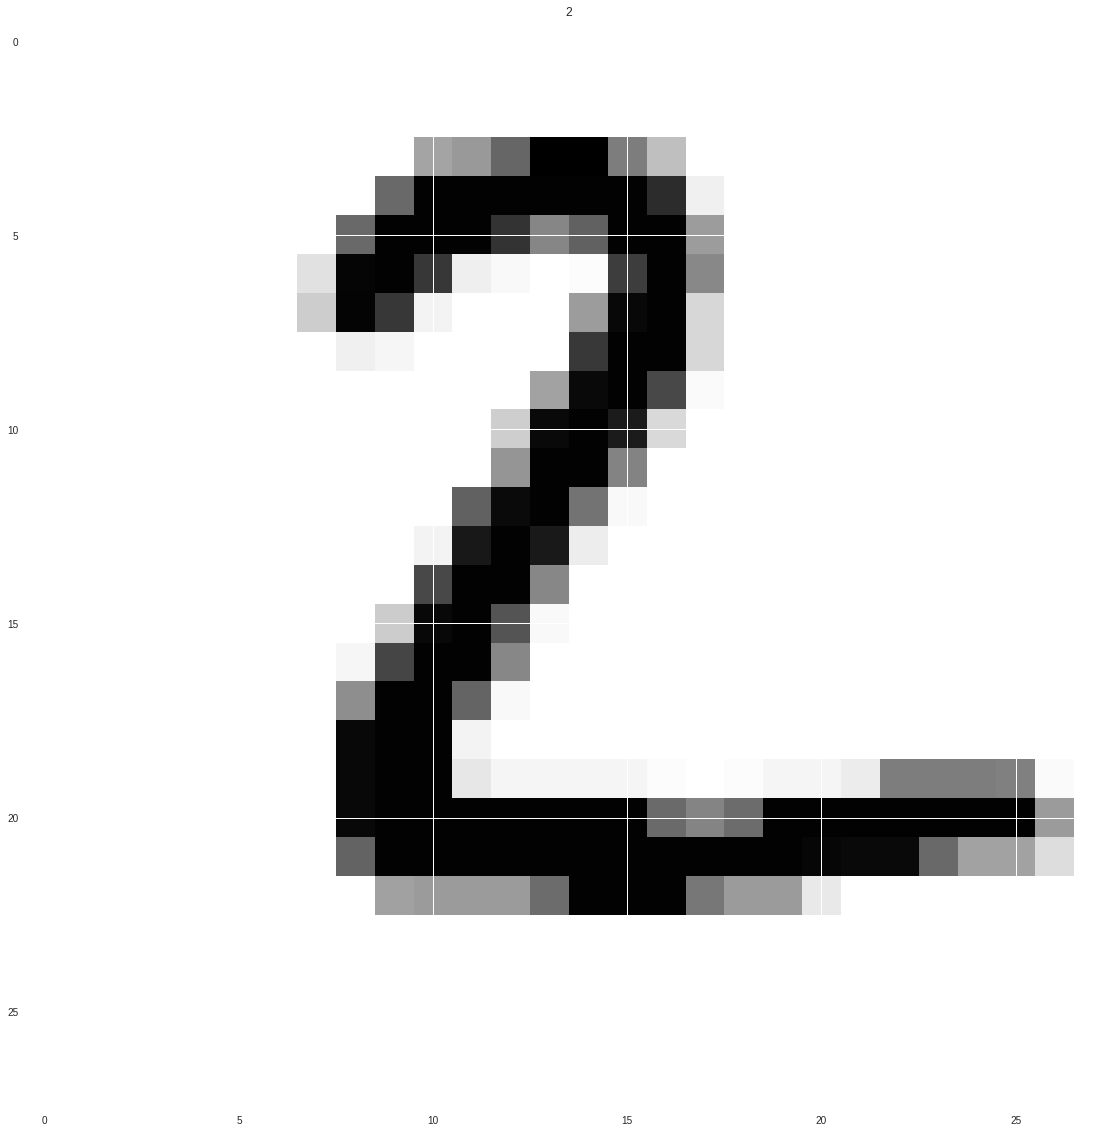

In [29]:
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = x_test[1].reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [0]:
model.save('mnist.h5')

In [0]:
from keras.models import load_model

In [0]:
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('mnist.h5')